## Census Income Prediction

### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### To predict:
Income >$50K

### EDA (Exploratory Data Analysis)

In [3]:
#Checking for shape
df.shape

(32560, 15)

We can see the data set contains 32,560 rows and 15 columns.

In [7]:
#Checking the columns
df.columns.to_list()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

Here we can see the columns present in the data set.

In [8]:
#Checking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The data set has no null values as for now. Great!

In [9]:
#Checking for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The info() method gives the information about the range index, column names, non-null counts, data types and memory usage.

In [10]:
#Checking for data types
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Here we can see that the data set contains 6 int and 9 object data types.

In [11]:
#Checking the value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

We can see that the data set has no nulls or white spaces present in it. Let's move ahead.

In [3]:
#Let's separate numerical and categorical columns
#Checking for categorical columns
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical columns:", cat_col)
print("\n")


#Checking for numerical columns
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        num_col.append(i)
print("Numerical columns:", num_col)
print("\n")

Categorical columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical columns: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']




Now we have separated the numerical and categorical columns. Let's proceed ahead.

In [13]:
#Checking no. of unique vales in each values
df.nunique().to_frame("No. of unique values")

,No. of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [14]:
#Checking the no. of unique values in target variable
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

We can see there are two values present in the target column, i.e. <=50K and >50K.

In [15]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Here, we can notice that more number of people make <=50K income in a year.

In [17]:
#Checking the description
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


This gives the statistical summary about the data set. It gives information about count of values in each column, mean, standard deviation, min, 25%, 50%, 75% quantiles and max values.

From the above describe() method we conclude that:

- The counts of all the values in the columns are the same that means no missing values are there.
- The median(50%) values are relatively less than mean values that means the data is slightly skewed to right.
- By summerizing the data we can observe that there is a huge difference between 75% and max values. Hence, there are outliers present in the data set.

### Data Visualization

#### Univariate Analysis

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


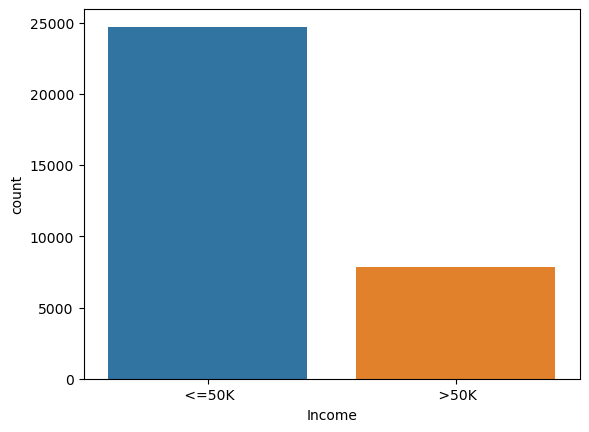

In [18]:
#Visualizing the target column
ax = sns.countplot(x='Income', data=df)
print(df['Income'].value_counts())

From the above plot we can notice that people with >50K income are much lesser in number than those with <=50K income.

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


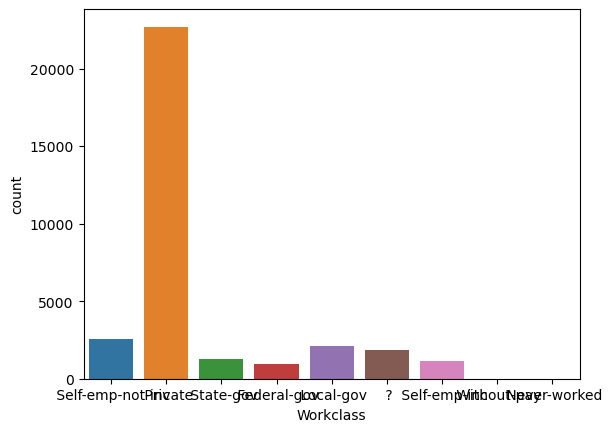

In [19]:
#Visulaizing the Workclass
print(df['Workclass'].value_counts())
ax = sns.countplot(x='Workclass', data=df)
plt.show()

Here we can see that most of the people work in private companies.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


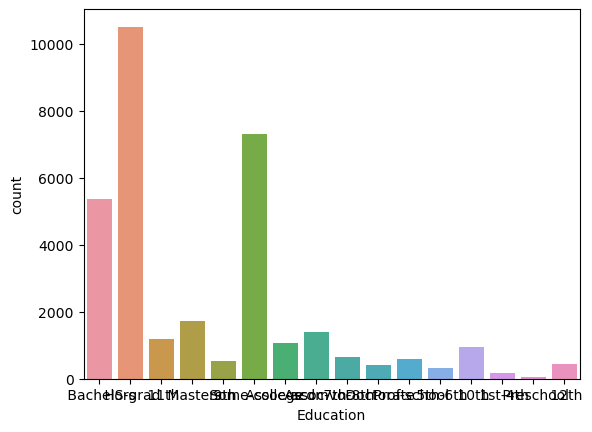

In [20]:
#Visulaizing Education
print(df['Education'].value_counts())
ax = sns.countplot(x='Education', data=df)
plt.show()

Here we can see most of the people are High School graduate, some have college level education followed by Bachelors and Masters degree and so on.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


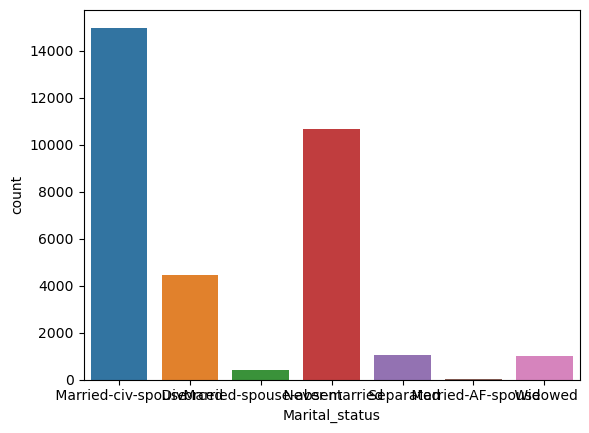

In [22]:
#Visulaizing Marital_status
print(df['Marital_status'].value_counts())
ax = sns.countplot(x='Marital_status', data=df)
plt.show()

Married people are more in number followed by those who are never married and then comes divorced and so on.

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


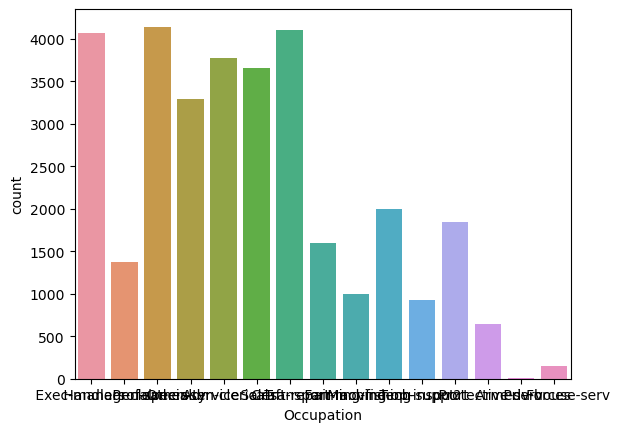

In [23]:
#Visualizing Occupation
print(df['Occupation'].value_counts())
ax = sns.countplot(x='Occupation', data=df)
plt.show()

People with prof-speciality are higher in number then comes craft-repairing people, exec-managerial, adm-clerical and so on.

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


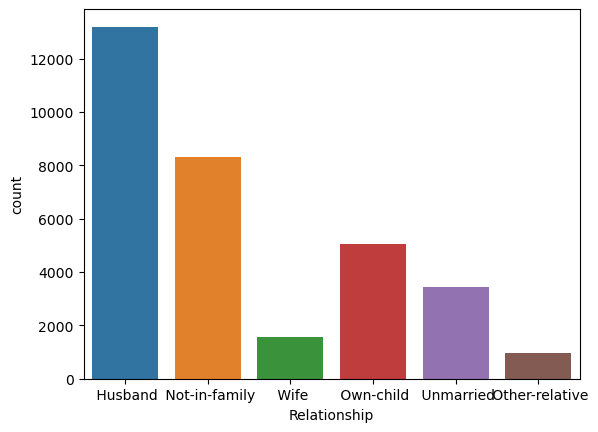

In [24]:
#Visualizing Relationship
print(df['Relationship'].value_counts())
ax = sns.countplot(x='Relationship', data=df)
plt.show()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


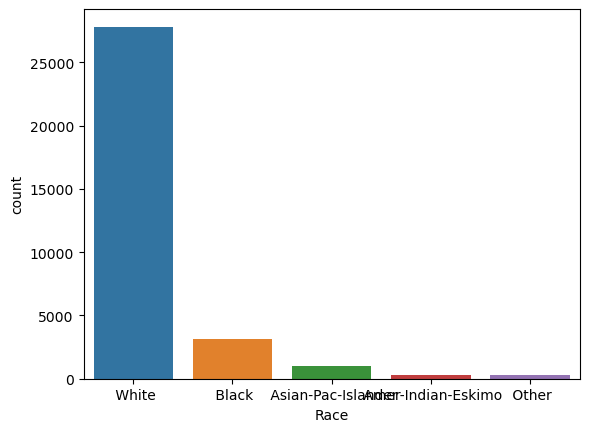

In [25]:
#Visualizing Race
print(df['Race'].value_counts())
ax = sns.countplot(x='Race', data=df)
plt.show()

Here, whites are much more in number than others.

 Male      21789
 Female    10771
Name: Sex, dtype: int64


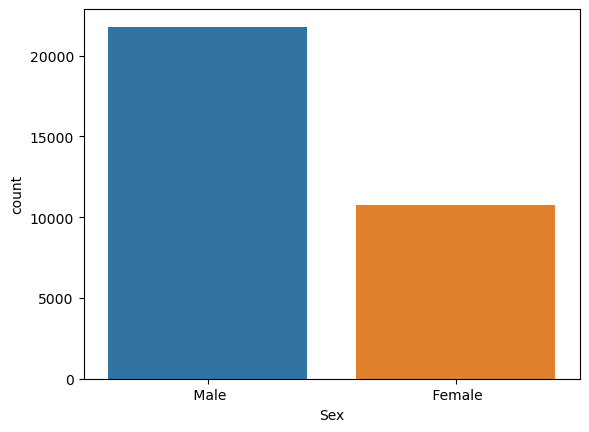

In [26]:
#Visualizing Sex
print(df['Sex'].value_counts())
ax = sns.countplot(x='Sex', data=df)
plt.show()

Here, males are more in number than females.

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

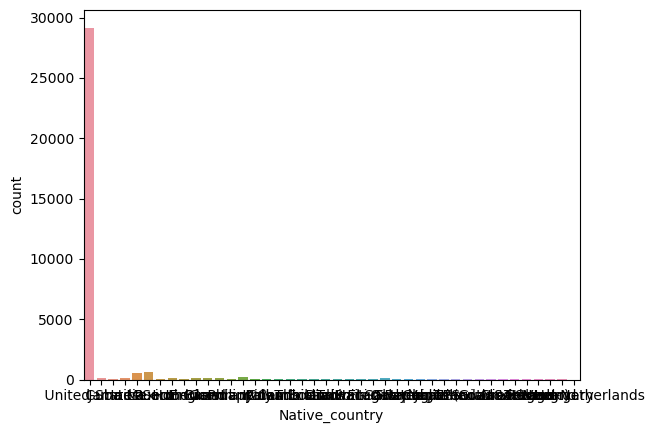

In [30]:
#Visualizing Native_country
print(df['Native_country'].value_counts())
ax = sns.countplot(x='Native_country', data=df)
plt.show()

Most of the people belong from United States.

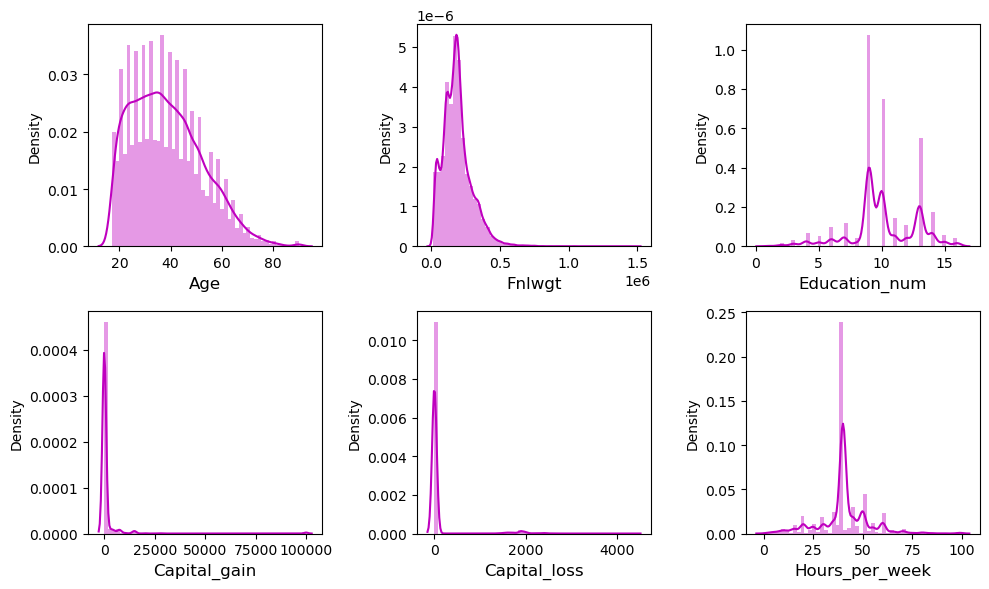

In [31]:
#Vsualizing rest of the data using distplot
plt.figure(figsize= (10,6), facecolor='white')
plotnumber=1
for col in num_col:
    if plotnumber<=6:
        ax = plt.subplot(2,3, plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
    plt.tight_layout()

From the above plot we can notice that the columns Age, Fnlwgt, Capital_gain and Capital_loss are right-skewed and rest are fine.

### Bivariate Analysis

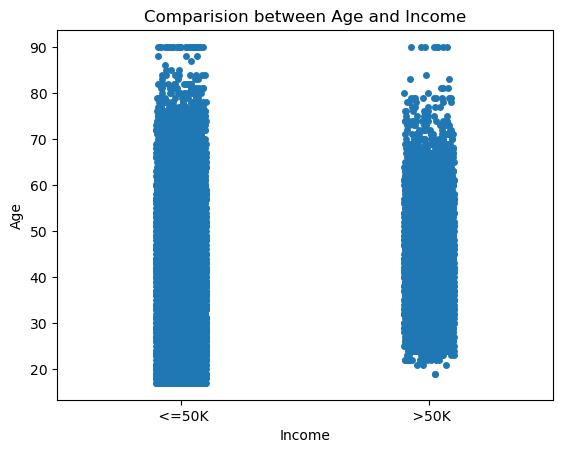

In [36]:
#Comparing Income and Age
plt.title("Comparision between Age and Income")
sns.stripplot(x = "Income", y = "Age", data=df)
plt.show()

Most of the people have <=50K income.

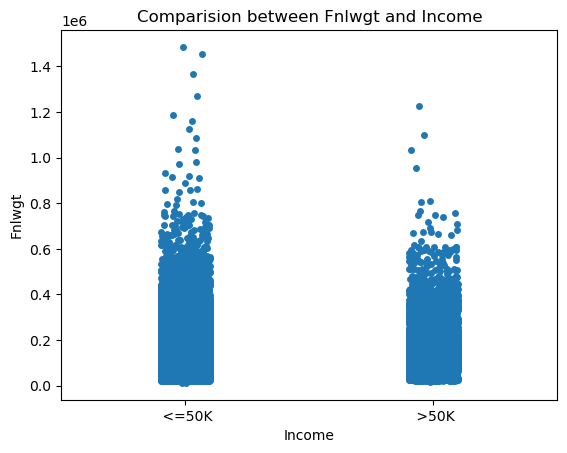

In [37]:
#Comparing Income and Fnlwgt
plt.title("Comparision between Fnlwgt and Income")
sns.stripplot(x = "Income", y = "Fnlwgt", data=df)
plt.show()

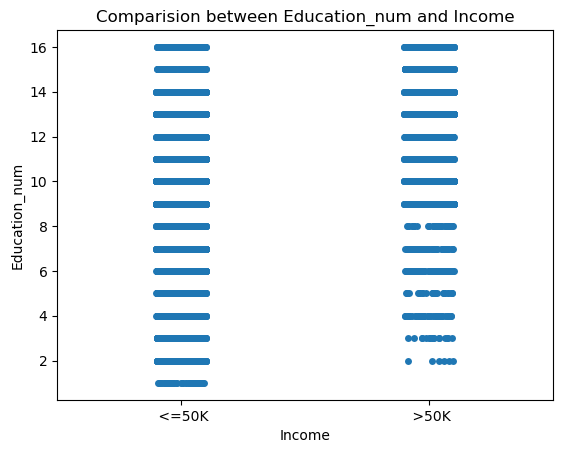

In [45]:
#Comparing Income and Education_num
plt.title("Comparision between Education_num and Income")
sns.stripplot(x = "Income", y = "Education_num", data=df)
plt.show()

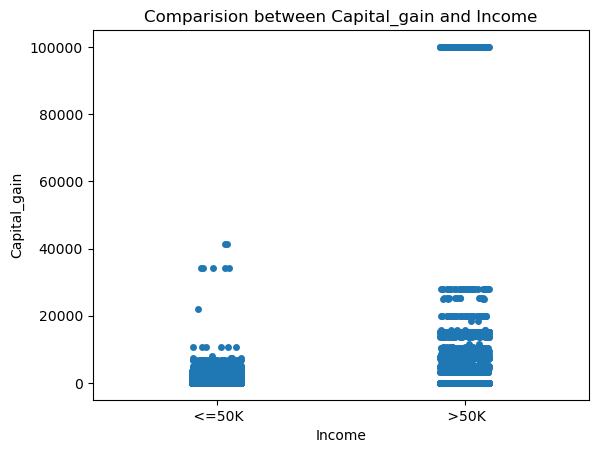

In [46]:
#Comparing Income and Capital_gain
plt.title("Comparision between Capital_gain and Income")
sns.stripplot(x = "Income", y = "Capital_gain", data=df)
plt.show()

Greater than 50K has more gain as compared to <=50K income.

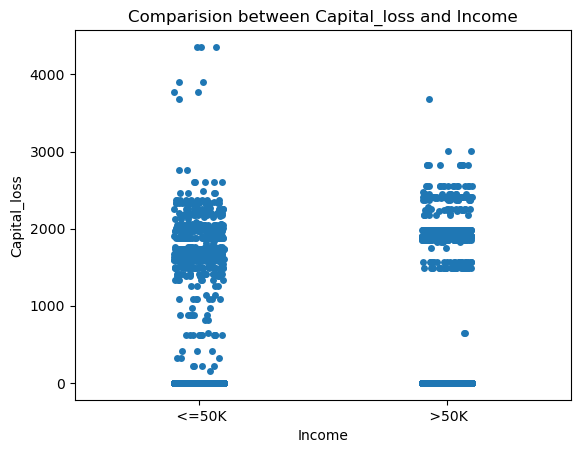

In [47]:
#Comparing Income and Capital_loss
plt.title("Comparision between Capital_loss and Income")
sns.stripplot(x = "Income", y = "Capital_loss", data=df)
plt.show()

<=50K has more loss as compared to >50K income.

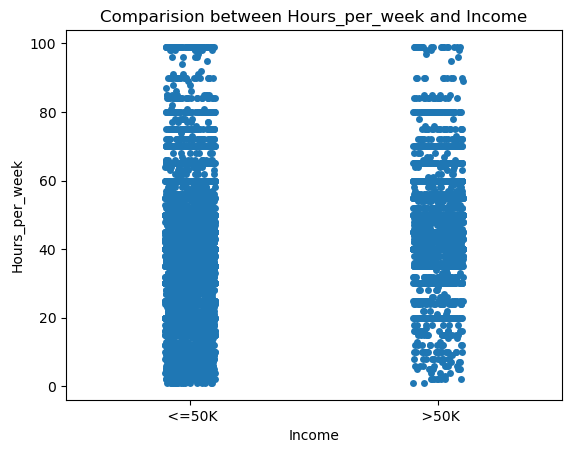

In [49]:
#Comparing Income and Hours_per_week
plt.title("Comparision between Hours_per_week and Income")
sns.stripplot(x = "Income", y = "Hours_per_week", data=df)
plt.show()

No significant difference.

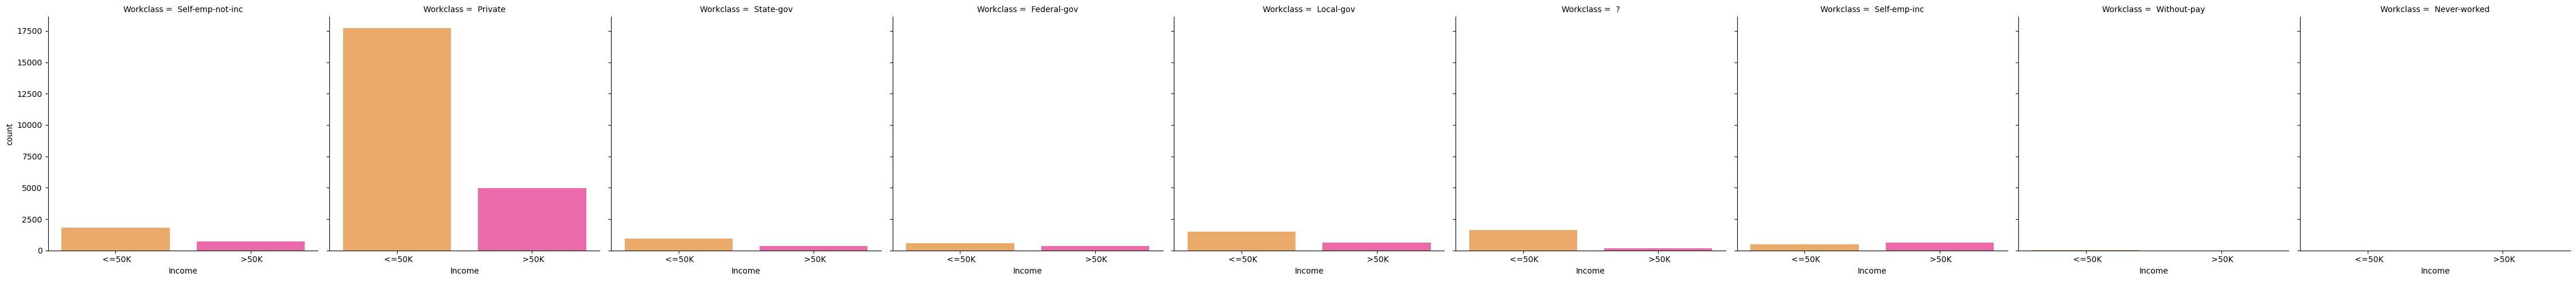

In [59]:
#Checking Income and Workclass
sns.catplot(x = 'Income', col = 'Workclass', data = df, kind = 'count', palette = 'spring_r')
plt.show()

Comparing Income and Workclass we can see that only in Self-emp-inc has income >50K higher in number and every field has <=50K income.

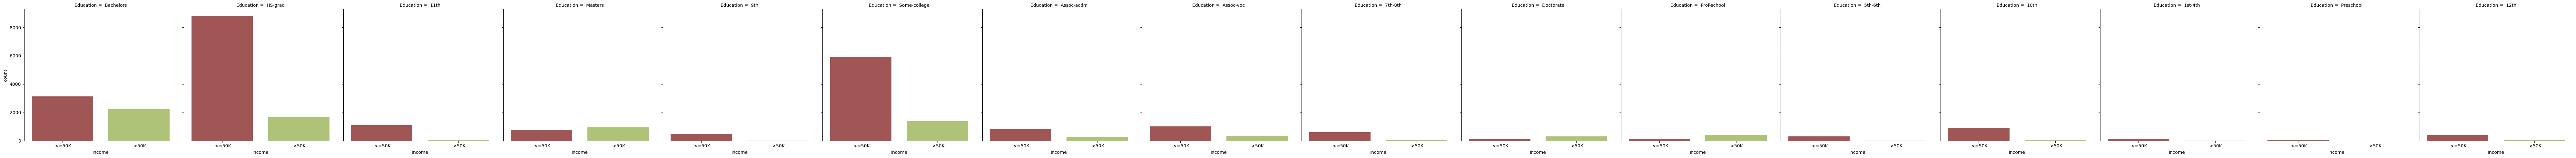

In [51]:
#Checking Income and Education
sns.catplot(x= 'Income', col='Education', data = df, palette='tab20b_r', kind ='count')
plt.show()

Here, we can notice that people with Masters, Doctorate and School Professor have >50K income and the rest have <=50K income.

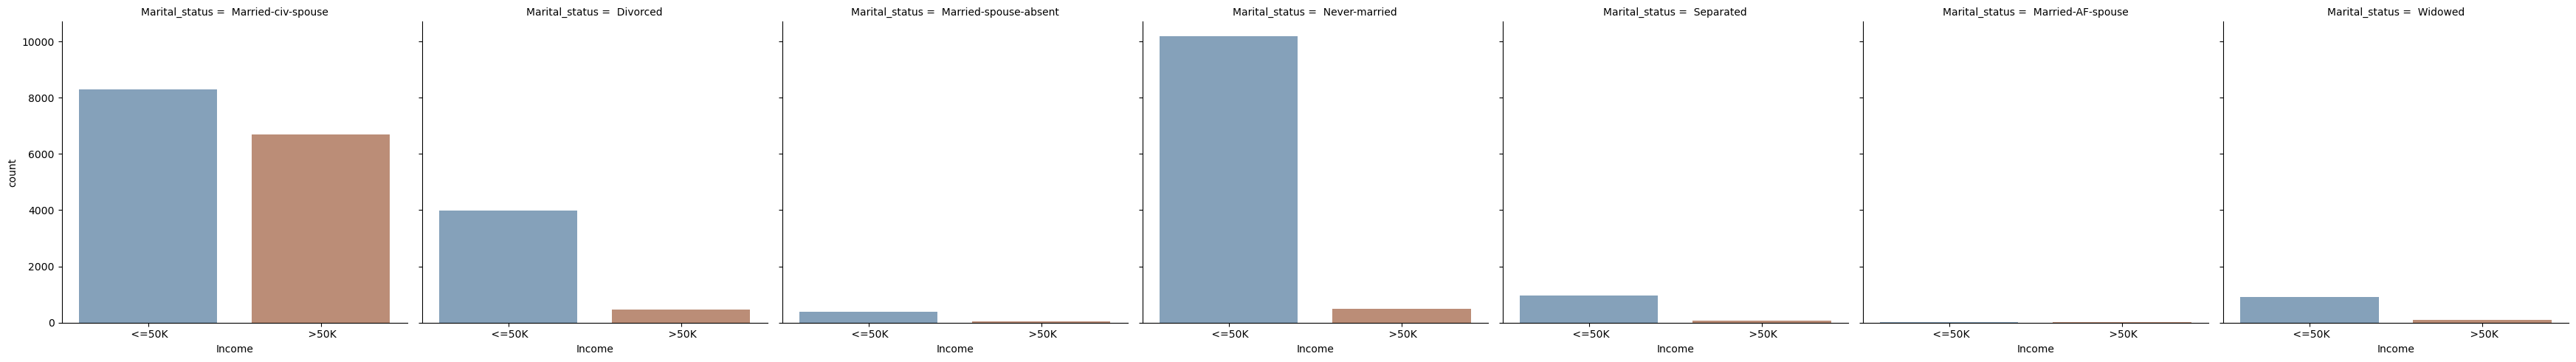

In [52]:
#Checking Income in Marital_status
sns.catplot(x= 'Income', col='Marital_status', data=df, kind='count', palette='twilight_shifted')
plt.show()

Here, every category has <=50K income more in number compared to >50K.

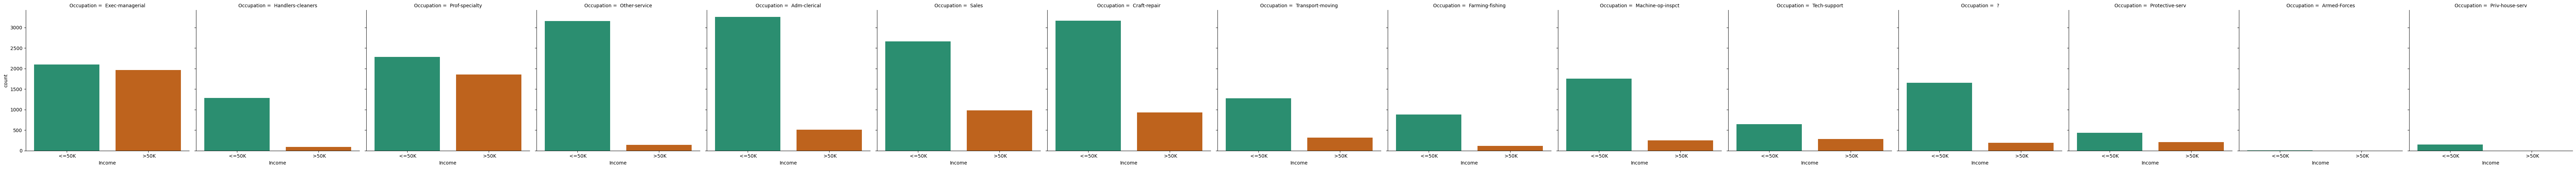

In [54]:
#Checking Income in Occupation
sns.catplot(x='Income', col='Occupation', data=df, kind='count', palette='Dark2')
plt.show()

Here, the people from every field make <=50K income more than >50K.

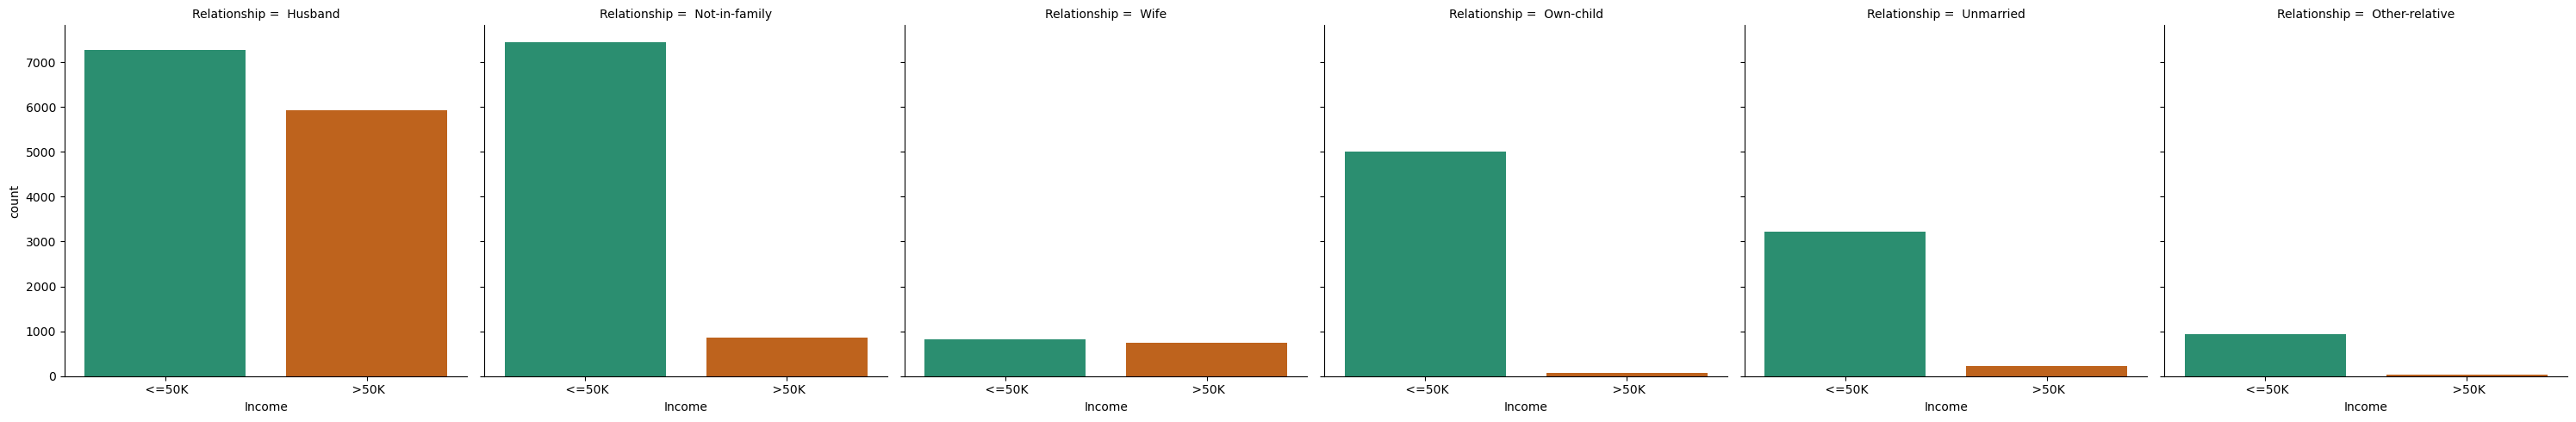

In [55]:
#Checking Income in Relationship
sns.catplot(x='Income', col='Relationship', data=df, kind='count', palette='Dark2')
plt.show()

Here, mostly Husbands make more income as compared to others.

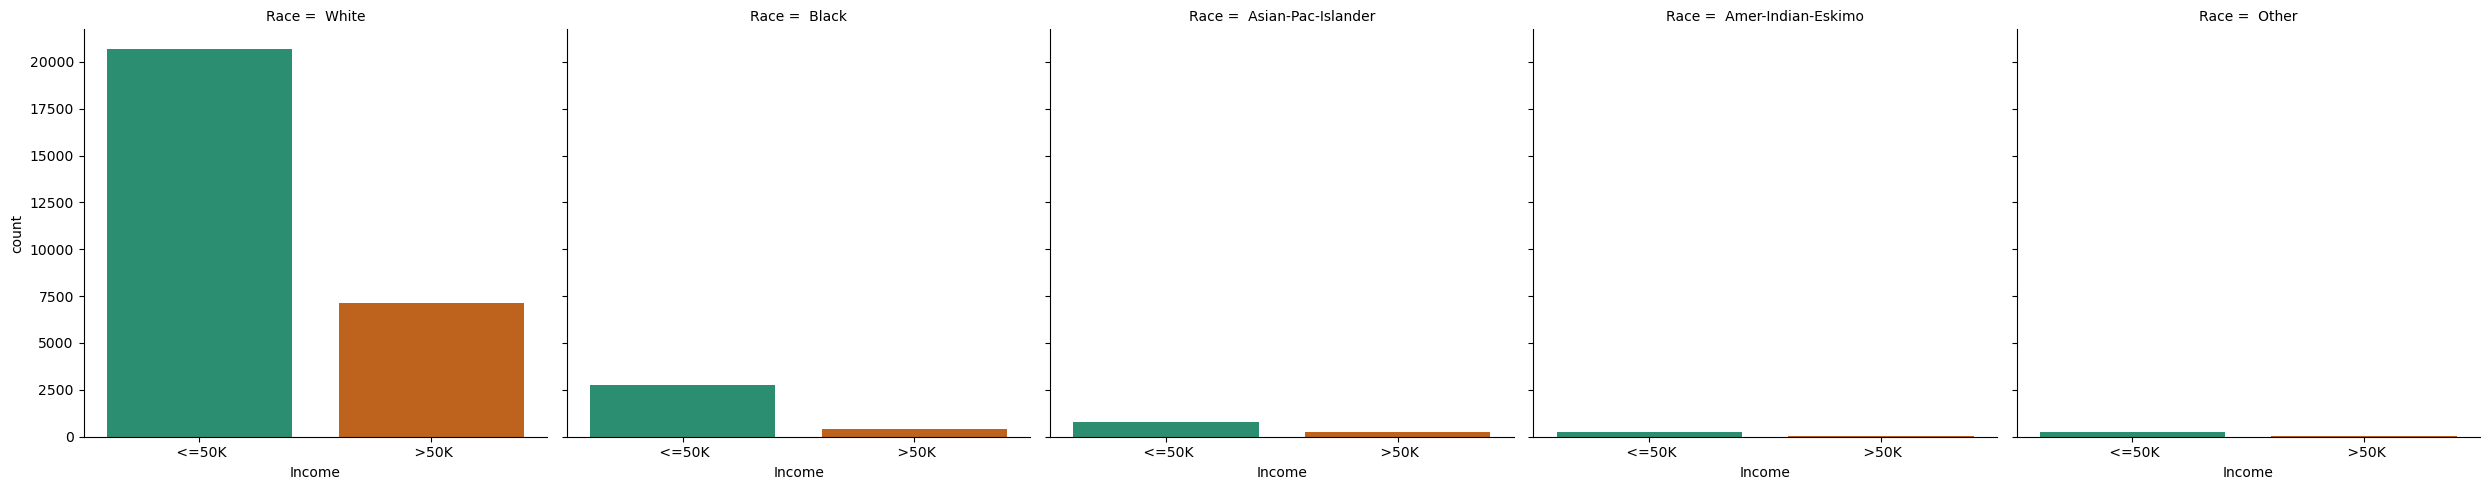

In [56]:
#Checking Income in Race
sns.catplot(x='Income', col='Race', data=df, kind='count', palette='Dark2')
plt.show()

Here, whites make more income of <=50K than >50K.

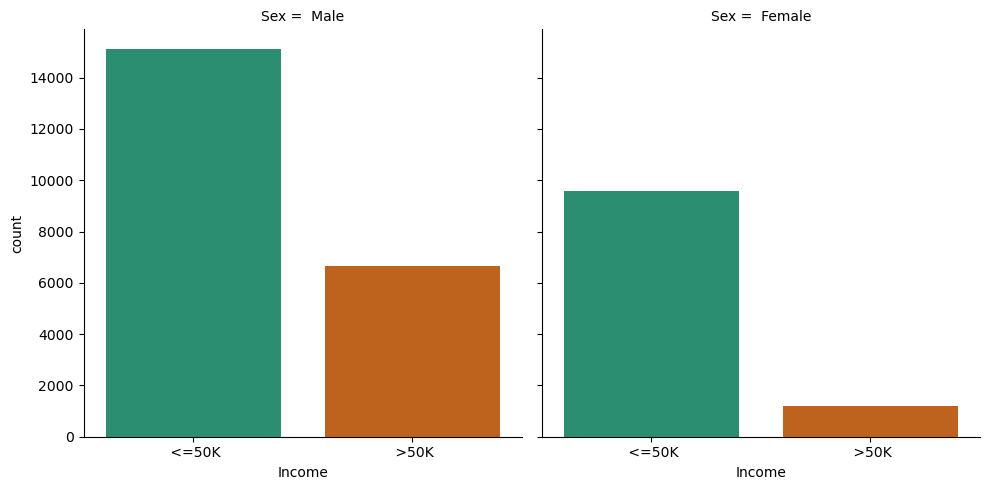

In [57]:
#Checking Income in Sex
sns.catplot(x='Income', col='Sex', data=df, kind='count', palette='Dark2')
plt.show()

Here, males make more income of <=50K compared to females.

### Multivariate Analysis

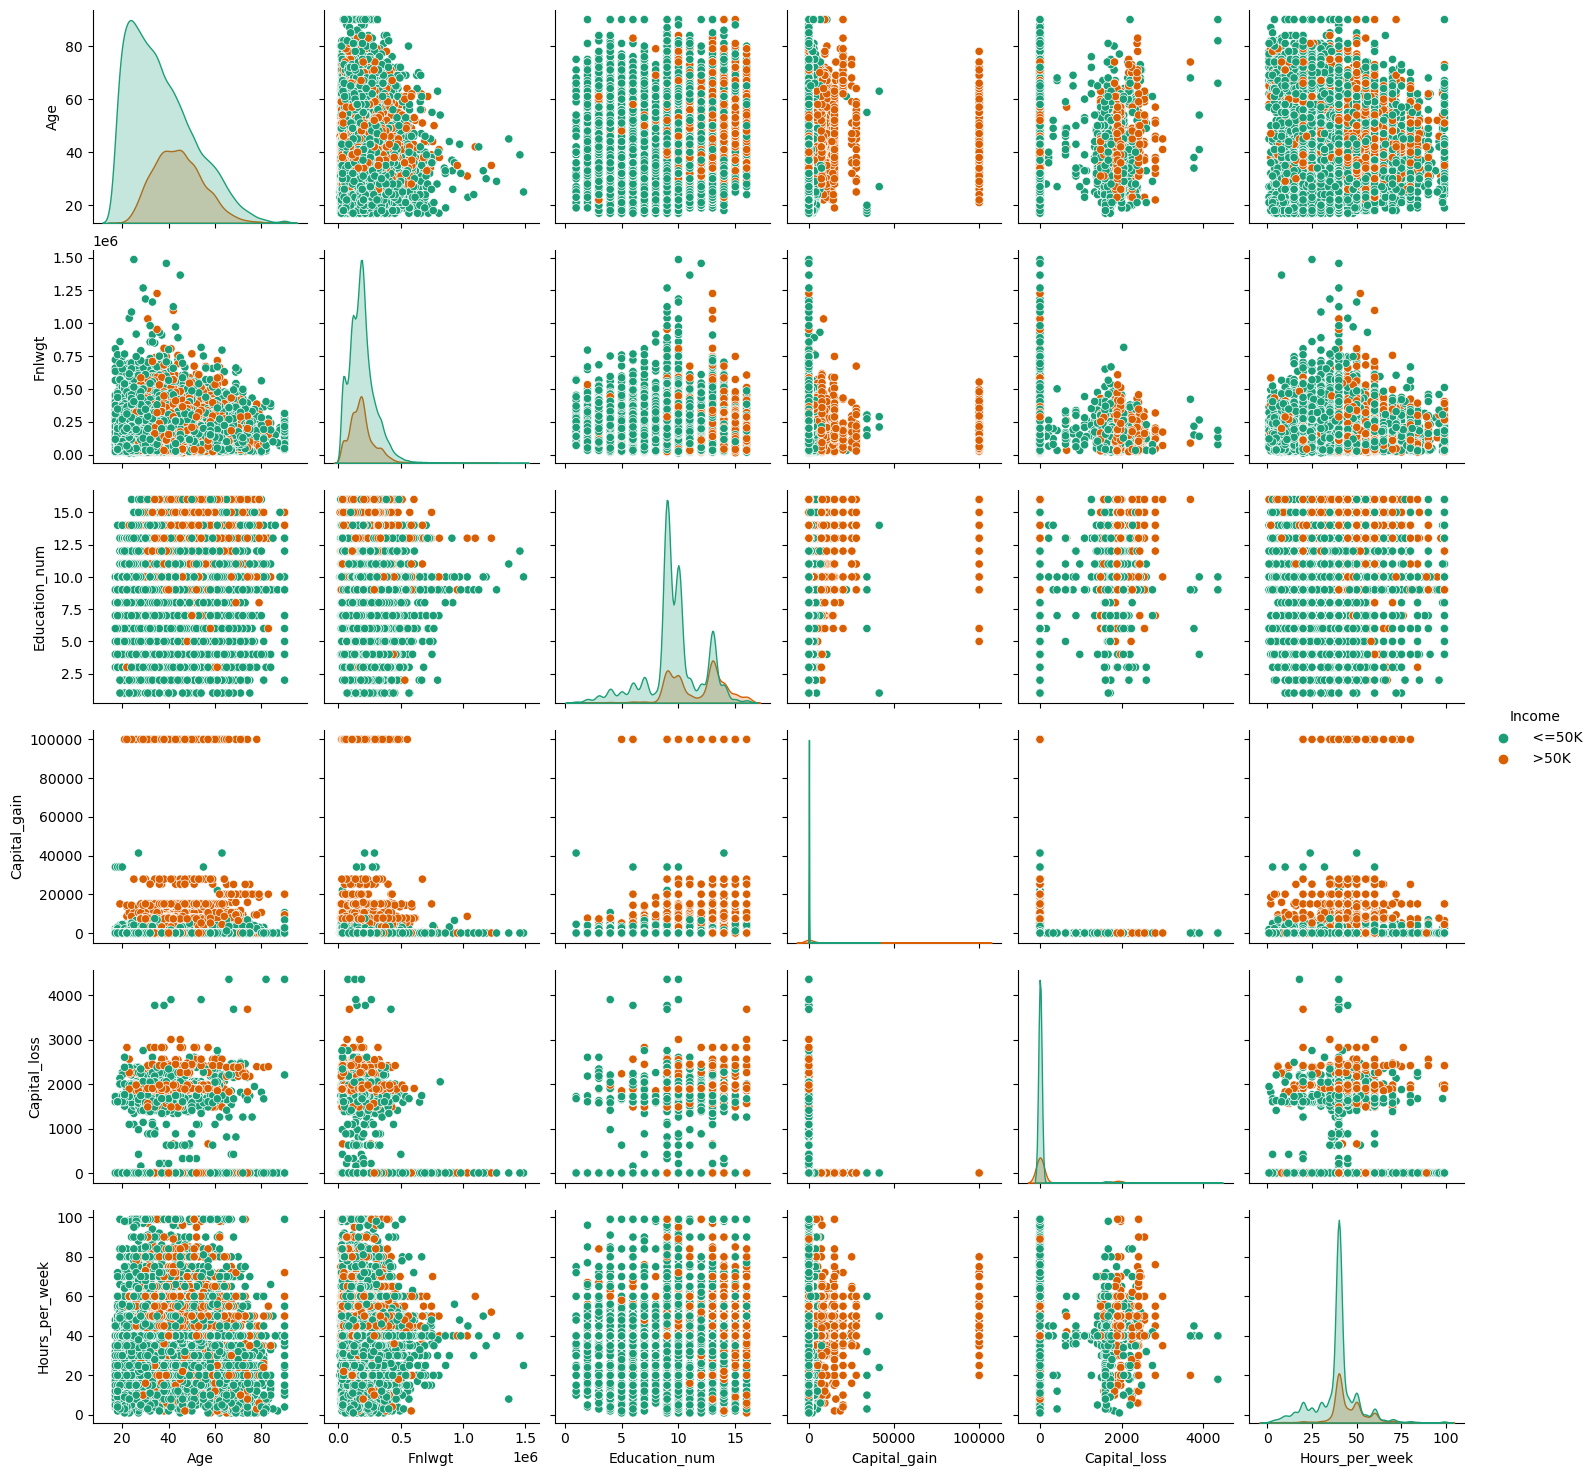

In [61]:
sns.pairplot(df, hue="Income", palette = "Dark2")
plt.show()

- The above pair plot gives the pairwise relationship between features on the basis of "Income".
- On the diagonal we notice the distribution plot.
- We can see some outliers here, let's plot boxolot to check for outliers.

### Checking for outliers

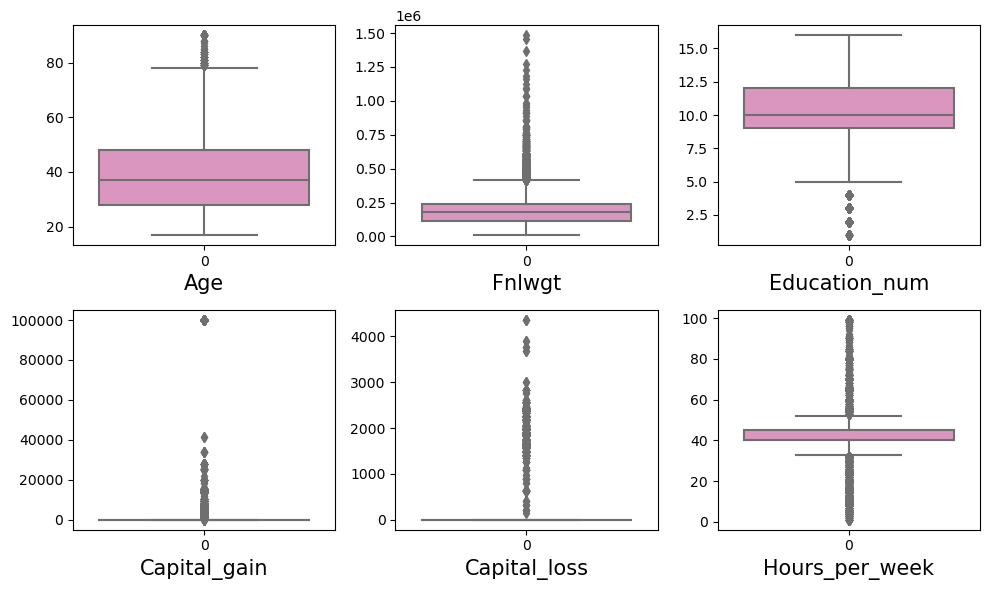

In [62]:
#Checking for outliers by box plot
plt.figure(figsize= (10, 6), facecolor="white")
plotnumber=1
for col in num_col:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()    

We can see there are some outliers present in all of them. Let's remove them.

Before dealing with outliers, let's encode the data into numerical using Ordinal Encoder.

### Ordinal Encoder

In [5]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df        

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


We have successfully encoded the data. Let's move ahead.

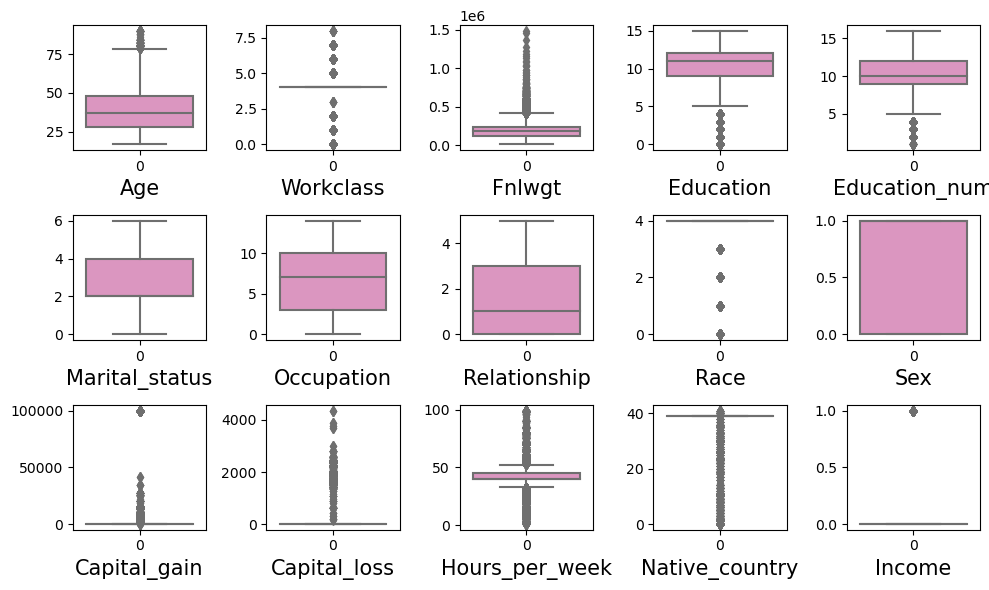

In [66]:
#Let's check for outliers again
plt.figure(figsize= (10, 6), facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()    

We can notice outliers in Age, Workclass, Fnlwgt, Education, Education_num, Race, Capital_gain, Capital_loss, Hours_per_week, Native_country and Income. We have to deal with them.

### Z Score

In [6]:
#Applying Z Score technique to remove outliers
from scipy.stats import zscore
import numpy as np

out_features = df[['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Race', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country', 'Income']]
z = np.abs(zscore(df))
z.shape

(32560, 15)

In [7]:
threshold = 3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [8]:
z.iloc[3,13]

4.054156655343599

In [9]:
#Removing the data above Zscore and creating new df
df1= df[(z<3).all(axis=1)]
df1.shape

(27417, 15)

In [10]:
#Shape of old and new dataframe
print('Shape of Old dataframe :', df.shape)
print('Shape of New dataframe :', df1.shape)

Shape of Old dataframe : (32560, 15)
Shape of New dataframe : (27417, 15)


In [11]:
print("Data Loss Percentage :", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage : 15.795454545454547


Here, we have 15% data loss, which is acceptable.

In [12]:
df=df1

### IQR Method

In [75]:
#Let's find more outliers by IQR Method
#1st quantile
Q1 = out_features.quantile(0.25)

#3rd quantile
Q3 = out_features.quantile(0.75)

#IQR
IQR = Q3 - Q1

df2 = df[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [76]:
df2.shape

(7888, 15)

In [77]:
print("Data Loss Percentage after removing outliers with IQR method :", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers with IQR method : 71.22952912426597


We can't accept it as there is 71% data loss.

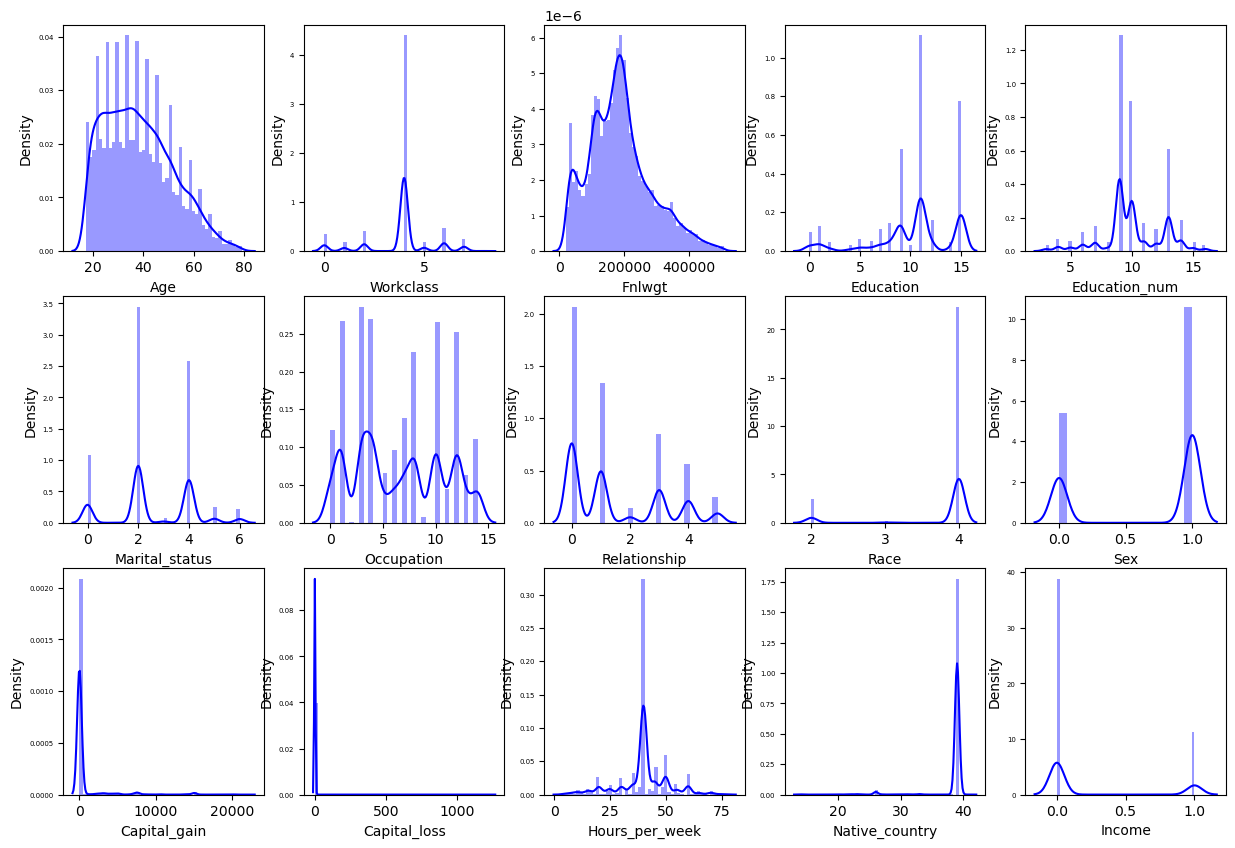

In [78]:
#Checking how data is distributed in each column
plt.figure(figsize=(15, 10), facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(3,5, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=10)
        plt.yticks(rotation=0, fontsize=5)
    plotnumber+=1
plt.show()    

The data looks good from before but we can notice some skewness here. Let's deal with them later.

### Checking for Correlation 

In [79]:
#Let's see the correlation between features and label
cor = df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.005550,-0.077696,-0.003468,0.044081,-0.285866,-0.015548,-0.270293,0.019111,0.088655,0.132075,0.023576,0.091284,0.031861,0.240812
Workclass,0.005550,1.000000,-0.021209,0.021548,0.049536,-0.061751,0.249485,-0.089897,0.063215,0.092388,0.025033,-0.007678,0.126808,-0.002430,0.040617
Fnlwgt,-0.077696,-0.021209,1.000000,-0.021115,-0.040499,0.029745,-0.003014,0.016309,-0.104179,0.022103,-0.003383,0.003242,-0.019049,-0.101129,-0.011482
Education,-0.003468,0.021548,-0.021115,1.000000,0.347380,-0.036817,-0.023478,-0.010712,0.026797,-0.030860,0.026506,-0.000368,0.059737,0.085089,0.071124
Education_num,0.044081,0.049536,-0.040499,0.347380,1.000000,-0.058411,0.111075,-0.094415,0.085832,0.003929,0.157635,0.007583,0.157519,0.139701,0.320437
Marital_status,-0.285866,-0.061751,0.029745,-0.036817,-0.058411,1.000000,-0.007683,0.183138,-0.083932,-0.125693,-0.069270,-0.016520,-0.198743,-0.034275,-0.193361
Occupation,-0.015548,0.249485,-0.003014,-0.023478,0.111075,-0.007683,1.000000,-0.077594,0.011857,0.081592,0.023061,-0.004016,0.069319,0.010534,0.070193
Relationship,-0.270293,-0.089897,0.016309,-0.010712,-0.094415,0.183138,-0.077594,1.000000,-0.148296,-0.575976,-0.091272,0.030393,-0.262685,-0.020746,-0.247992
Race,0.019111,0.063215,-0.104179,0.026797,0.085832,-0.083932,0.011857,-0.148296,1.000000,0.126540,0.031561,-0.000123,0.059800,0.059128,0.094250
Sex,0.088655,0.092388,0.022103,-0.030860,0.003929,-0.125693,0.081592,-0.575976,0.126540,1.000000,0.070941,-0.027519,0.236440,-0.004339,0.211917


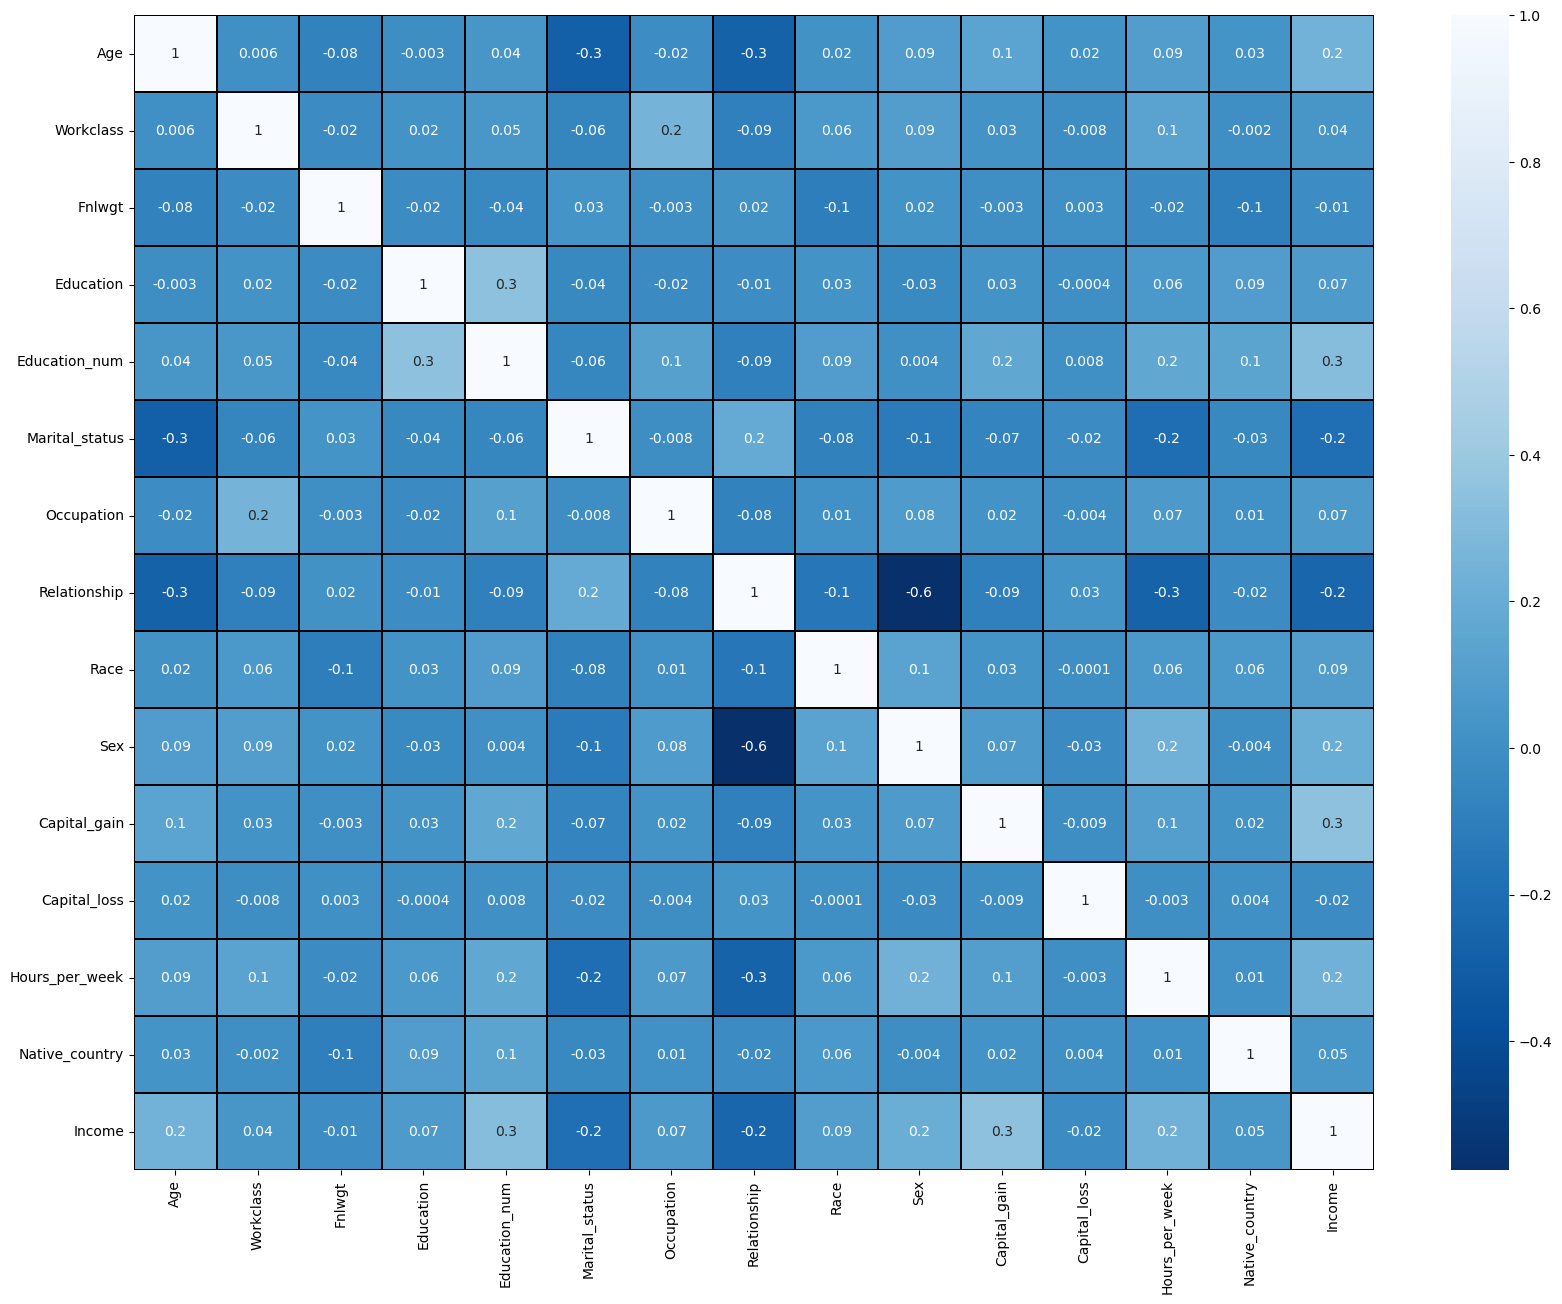

In [80]:
#Visualizing correlation by plotting a heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt=".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation=0)
plt.show()

- The above heatmap shows the correlation between features and label.
- We can noitce that there are no much positive correlations between features and label.
- The label is negatively correlated with Fnlwgt, Marital_status, Relationship and Capital_loss.
- The label is positively correlated with Age, Workclass, Education, Education_num, Occupation, Race, Sex, Capital_gain, Hours_per_week and Native_country.

In [81]:
cor['Income'].sort_values(ascending = False)

Income            1.000000
Capital_gain      0.342654
Education_num     0.320437
Age               0.240812
Hours_per_week    0.234333
Sex               0.211917
Race              0.094250
Education         0.071124
Occupation        0.070193
Native_country    0.048358
Workclass         0.040617
Fnlwgt           -0.011482
Capital_loss     -0.016631
Marital_status   -0.193361
Relationship     -0.247992
Name: Income, dtype: float64

Here, we can see that Income has 34% correlation which is good. No need to remove anything.

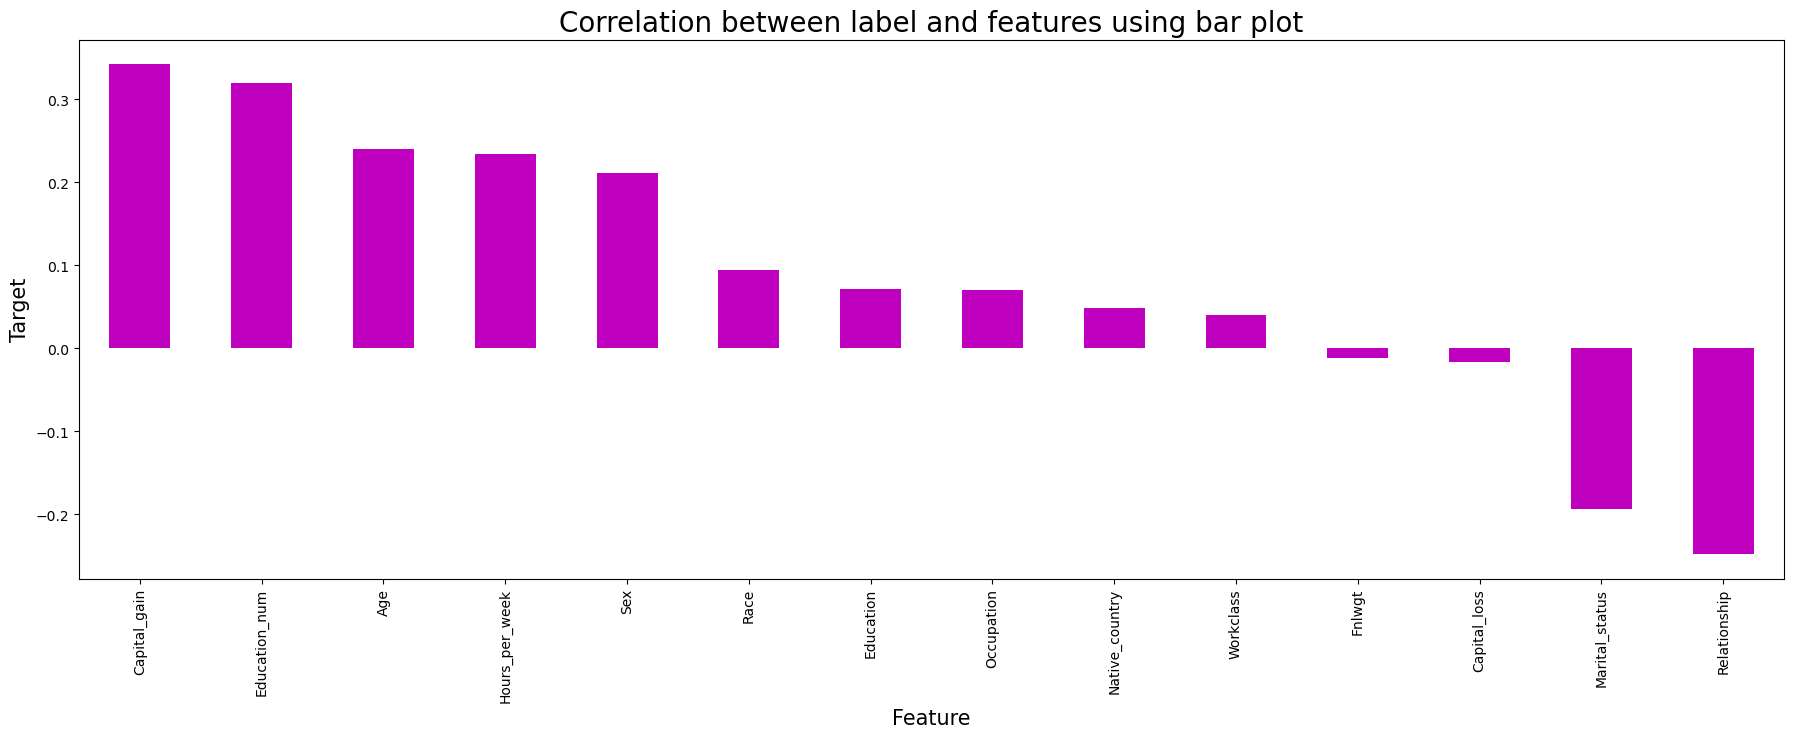

In [82]:
#Visualizing the correlation using bar plot
plt.figure(figsize = (22,7))
df.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Correlation between label and features using bar plot", fontsize=20)
plt.show()

Everything looks good. Let's proceed further.

### Checking for skewness

In [13]:
df.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
Income             1.324919
dtype: float64

We can see some skewness in Fnlwgt, Relationship, Capital_gain, Capital_loss and Income. Let's reduce it.

In [14]:
#Removing skewness using transformation methods
df['Fnlwgt'] = np.cbrt(df['Fnlwgt'])

df['Relationship'] = np.cbrt(df['Relationship'])

df['Capital_gain'] = np.cbrt(df['Capital_gain'])

df['Capital_loss'] = np.cbrt(df['Capital_loss'])

df['Income'] = np.cbrt(df['Income'])

In [15]:
#Let's check
df.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt            -0.383813
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship      -0.135567
Race              -2.592931
Sex               -0.684115
Capital_gain       3.369433
Capital_loss      25.462533
Hours_per_week    -0.358396
Native_country    -5.460675
Income             1.324919
dtype: float64

In [16]:
#We can still see skewness present 
df['Capital_gain'] = np.cbrt(df['Capital_gain'])

df['Capital_loss'] = np.cbrt(df['Capital_loss'])

df['Income'] = np.cbrt(df['Income'])

In [17]:
df.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt            -0.383813
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship      -0.135567
Race              -2.592931
Sex               -0.684115
Capital_gain       3.107939
Capital_loss      24.737201
Hours_per_week    -0.358396
Native_country    -5.460675
Income             1.324919
dtype: float64

Tried many methods but the skewness in Capital_gain and Capital_loss became NaN so I'm leaving it as it is.

Let's go ahead and separate features and label.

### Seaparating features and label

In [18]:
x = df.drop("Income", axis=1)
y = df["Income"]

### Feature scaling using Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.882739,1.474391,-1.113345,-0.345725,1.221891,-0.403219,-0.599291,-1.171641,0.344063,0.714839,-0.295976,-0.040482,-2.412190,0.193894
1,-0.011737,0.092844,0.452509,0.169985,-0.438259,-1.718982,-0.128090,0.330811,0.344063,0.714839,-0.295976,-0.040482,0.008200,0.193894
2,1.106358,0.092844,0.617669,-2.408564,-1.268334,-0.403219,-0.128090,-1.171641,-2.961763,0.714839,-0.295976,-0.040482,0.008200,0.193894
3,-0.086276,0.092844,1.010825,0.427839,1.636928,-0.403219,-0.599291,1.397516,0.344063,-1.398916,-0.295976,-0.040482,0.008200,0.193894
4,0.808199,0.092844,-0.091261,-1.119290,-2.098409,0.254663,0.343110,0.330811,-2.961763,-1.398916,-0.295976,-0.040482,-2.143257,-5.661131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27412,-0.831673,0.092844,0.801999,-0.861435,0.806853,-0.403219,1.521110,1.397516,0.344063,-1.398916,-0.295976,-0.040482,-0.171088,0.193894
27413,0.137342,0.092844,-0.155180,0.169985,-0.438259,-0.403219,0.107510,-1.171641,0.344063,0.714839,-0.295976,-0.040482,0.008200,0.193894
27414,1.479056,0.092844,-0.182759,0.169985,-0.438259,2.228308,-1.306091,1.213353,0.344063,-1.398916,-0.295976,-0.040482,0.008200,0.193894
27415,-1.204371,0.092844,0.323530,0.169985,-0.438259,0.912545,-1.306091,0.995270,0.344063,0.714839,-0.295976,-0.040482,-1.784681,0.193894


We have scaled the data to reduce biasness between features.

### Checking for VIF

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"] = [variance_inflation_factor(x.values, i)
                    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF Values,Features
0,1.221894,Age
1,1.088626,Workclass
2,1.025866,Fnlwgt
3,1.147579,Education
4,1.219921,Education_num
5,1.172096,Marital_status
6,1.088931,Occupation
7,1.964793,Relationship
8,1.049476,Race
9,1.670821,Sex


Everything looks good. Let's go ahead.

In [21]:
#Checking the value count of the target column
y.value_counts()

0.0    21279
1.0     6138
Name: Income, dtype: int64

The data looks imbalanced, we have to balance the data. Since it is a classification problem we will use OverSampling method to balance the data.

### OverSampling

In [22]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()

x,y = SM.fit_resample(x,y)   

In [23]:
#Checking again
y.value_counts()

0.0    21279
1.0    21279
Name: Income, dtype: int64

Successfully balanced the data.

### Data Modelling

In [24]:
#Finding best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best accuracy score is", maxAccu, "at random_state", maxRS)        

Best accuracy score is 0.90656328320802 at random_state 130


### Creating Train Test Split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=maxRS)

### Classification Algorithms

In [26]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [27]:
#Checking accuracy for Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.90656328320802
[[5680  654]
 [ 539 5895]]
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      6334
         1.0       0.90      0.92      0.91      6434

    accuracy                           0.91     12768
   macro avg       0.91      0.91      0.91     12768
weighted avg       0.91      0.91      0.91     12768



In [28]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7879855889724311
[[4891 1443]
 [1264 5170]]
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      6334
         1.0       0.78      0.80      0.79      6434

    accuracy                           0.79     12768
   macro avg       0.79      0.79      0.79     12768
weighted avg       0.79      0.79      0.79     12768



In [29]:
#SVC
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8400689223057645
[[4915 1419]
 [ 623 5811]]
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      6334
         1.0       0.80      0.90      0.85      6434

    accuracy                           0.84     12768
   macro avg       0.85      0.84      0.84     12768
weighted avg       0.85      0.84      0.84     12768



In [30]:
#Gradient Boosting
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test, predGBC))
print(confusion_matrix(y_test, predGBC))
print(classification_report(y_test, predGBC))

0.8730419799498746
[[5334 1000]
 [ 621 5813]]
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      6334
         1.0       0.85      0.90      0.88      6434

    accuracy                           0.87     12768
   macro avg       0.87      0.87      0.87     12768
weighted avg       0.87      0.87      0.87     12768



In [31]:
#Ada Boost
AB = AdaBoostClassifier()
AB.fit(x_train, y_train)
predAB = AB.predict(x_test)
print(accuracy_score(y_test, predAB))
print(confusion_matrix(y_test, predAB))
print(classification_report(y_test, predAB))

0.8569862155388471
[[5276 1058]
 [ 768 5666]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      6334
         1.0       0.84      0.88      0.86      6434

    accuracy                           0.86     12768
   macro avg       0.86      0.86      0.86     12768
weighted avg       0.86      0.86      0.86     12768



In [32]:
#Bagging Classifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.8875313283208021
[[5680  654]
 [ 782 5652]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      6334
         1.0       0.90      0.88      0.89      6434

    accuracy                           0.89     12768
   macro avg       0.89      0.89      0.89     12768
weighted avg       0.89      0.89      0.89     12768



In [33]:
#Extra Trees
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test, predETC))
print(confusion_matrix(y_test, predETC))
print(classification_report(y_test, predETC))

0.9104793233082706
[[5642  692]
 [ 451 5983]]
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      6334
         1.0       0.90      0.93      0.91      6434

    accuracy                           0.91     12768
   macro avg       0.91      0.91      0.91     12768
weighted avg       0.91      0.91      0.91     12768



We can see that of all the algorithms Extra Trees Classifier gives the best score of 91%.

### Cross Validation Score

In [34]:
#Checking cv score Random Forest Classifier
score = cross_val_score(RF,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predRF) - score.mean())

[0.83059211 0.88721805 0.92422462 0.93091294 0.93032546]
0.9006546343608404
Difference between Accuracy score and cross validation score is -  0.005908648847179676


In [35]:
#Checking cv score Logistic Regression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predLR) - score.mean())

[0.77702068 0.78101504 0.78571429 0.77852191 0.78803901]
0.7820621842321701
Difference between Accuracy score and cross validation score is -  0.005923404740260985


In [36]:
#Checking cv score Gradient Boosting Classifier
score = cross_val_score(GBC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predGBC) - score.mean())

[0.81449718 0.85479323 0.87840695 0.87792269 0.87909764]
0.8609435390114342
Difference between Accuracy score and cross validation score is -  0.01209844093844048


In [37]:
#Checking cv score AdaBoost Classifier
score = cross_val_score(AB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predAB) - score.mean())

[0.81156015 0.84574718 0.85984492 0.86018094 0.85841852]
0.8471503430324135
Difference between Accuracy score and cross validation score is -  0.009835872506433585


In [38]:
#Checking cv score Bagging Classifier
score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predBC) - score.mean())

[0.79546523 0.86912594 0.91799812 0.92069087 0.9201034 ]
0.884676710391594
Difference between Accuracy score and cross validation score is -  0.0028546179292080476


In [39]:
#Checking cv score ExtraTrees Classifier
score = cross_val_score(ETC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predETC) - score.mean())

[0.86736372 0.89849624 0.92845395 0.93138292 0.92774057]
0.9106874794052457
Difference between Accuracy score and cross validation score is -  -0.0002081560969751095


Among all the models Extra Trees Classifier gives the best score with least difference between between accuracy and cross validation score.

### Hyper parmeter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
#Extra Trees Classifier
parameters = {'criterion' : ['gini', 'entropy'],
             'max_depth' : [0,10,20,30,40],
             'min_samples_split' : [-2, -1, 1, 2],
             'n_estimators' : [50, 100, 200, 300]}

In [42]:
grid = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [43]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'min_samples_split': [-2, -1, 1, 2],
                         'n_estimators': [50, 100, 200, 300]})

In [44]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 1,
 'n_estimators': 300}

In [55]:
final_model = ExtraTreesClassifier(criterion= 'gini',
                                  max_depth=40,
                                  min_samples_split=1,
                                  n_estimators=200)
final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

91.05576441102757


When we tried using the best parameters it gave 88% score but after setting max_depth to 40 and n_estimators to 200 we got a score of 91%, which is great!

### Saving the model

In [56]:
import pickle

filename = 'Income.pkl'
pickle.dump(final_model, open(filename, 'wb'))

In [57]:
loaded_model = pickle.load(open ('Income.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

91.05576441102757


In [58]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,12758,12759,12760,12761,12762,12763,12764,12765,12766,12767
Predicted,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Original,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Done!!!

### Documentation

- First we imported all the necessary libraries.
- Then we loaded the data set.
- Performed the EDA and all the steps incuded in it like checking the shape, checking for column names, checking for nulls, separated numerical and categorical columns, data description, data info, etc.
- Then we performed data visualization:
    - Univariate
    - Bivariate
    - Multivariate
- Then we checked for outliers and removed it using Z Score and IQR methods.
- Z score gave less data loss of 4% as compared to IQR method so we went along with Z score method.
- We checked for correlation between features and label and found very less positive correlation.
- We checked for skewness and reduced it using tranformation methods.
- Separated features and label.
- Applied Standard Scaler to reduce biasness between features.
- Checked for VIF and since everything was <10 so there was no need to remove anything.
- Then we checked for the value counts in 'y', i.e. the label and as it was imbalanced we used OverSampling method to balance it.
- Then we did data modelling.
- We imported the classification algorithms.
- Checked for best randm state.
- Created train test split.
- Trained all the models and got the accuracy score.
- Performed Cross Validation to get the least difference between accuracy and cross validation score.
- Performed Hyper parameter tuning in order to increase the accuracy.
- Fitted the model.
- Checked for best parameters.
- Altered some parameters value.
- Got an increase in accuracy. 
- Then saved the model using pickle for future use.